## Installation for MacOS

- **Step 1:** Install Java SE Development Kit https://www.oracle.com/java/technologies/downloads/#jdk21-mac
- **Step 2:** Install Apache Spark to Local https://spark.apache.org/downloads.html (Download, extract and copy it into the spark folder in the user folder (create it if you don't have one))

## Initialize Spark

In [87]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [88]:
!pip install --upgrade pip
!pip install findspark

In [89]:
import findspark

#Initialize spark file path
findspark.init("/Users/hunkargencyildiz/spark/spark-3.5.0-bin-hadoop3")

In [17]:
from pyspark import SparkContext

## Run Spark

In [32]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [33]:
# Define Spark
spark = SparkSession.builder.master("local").appName("time_series_forecasting").getOrCreate()

In [34]:
sc = spark.sparkContext

In [35]:
sc

<SparkContext master=local appName=time_series_forecasting>

In [36]:
sc.version

'3.5.0'

In [37]:
sc.appName

'time_series_forecasting'

In [27]:
# Don't forget
# sc.stop()

## Warm-up Tours

In [45]:
spark_df = spark.read.csv("./datasets/churn.csv", header = True, inferSchema = True)

In [46]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [47]:
# Type of Spark
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [48]:
# Cache df
spark_df.cache()

23/12/25 17:08:14 WARN CacheManager: Asked to cache already cached data.


DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

## Comparison pandas vs spark

In [49]:
import seaborn as sns
df = sns.load_dataset("titanic")

In [51]:
print("Spark Dataframe Type:", type(spark_df))
print("Pandas Dataframe Type:", type(df))

Spark Dataframe Type: <class 'pyspark.sql.dataframe.DataFrame'>
Pandas Dataframe Type: <class 'pandas.core.frame.DataFrame'>


In [54]:
print("Spark Dataframe Head:", spark_df.head())
print("Pandas Dataframe Head:", df.head())

Spark Dataframe Head: Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)
Pandas Dataframe Head:    survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]


print("Spark Dataframe Dtypes:", spark_df.dtypes) 
print("Pandas Dataframe Dtypes:", df.dtypes)

In [61]:
# print("Spark Dataframe Ndim:", spark_df.ndim) # Give error
print("Pandas Dataframe Ndim:", df.ndim)

Pandas Dataframe Ndim: 2


## PySpark Functions

In [63]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [67]:
# Pandas Head = Spark Show
spark_df.show()
spark_df.show(5, truncate=True)

+---+-------------------+----+--------------+---------------+-----+---------+-----+
|_c0|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+-------------------+----+--------------+---------------+-----+---------+-----+
|  0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|  5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  7|      Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|  8|        Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0

In [68]:
# Row Count
spark_df.count()

900

In [69]:
# Cols
spark_df.columns

['_c0',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [70]:
# Describe statistics
spark_df.describe().show()

23/12/25 17:15:57 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         NULL|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         NULL|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [72]:
# Select a col
spark_df.describe("Age").show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              900|
|   mean|41.81666666666667|
| stddev|6.127560416916251|
|    min|             22.0|
|    max|             65.0|
+-------+-----------------+



In [75]:
# Select cols
spark_df.select("Age", "Names").show()

+----+-------------------+
| Age|              Names|
+----+-------------------+
|42.0|   Cameron Williams|
|41.0|      Kevin Mueller|
|38.0|        Eric Lozano|
|42.0|      Phillip White|
|37.0|     Cynthia Norton|
|48.0|   Jessica Williams|
|44.0|        Eric Butler|
|32.0|      Zachary Walsh|
|43.0|        Ashlee Carr|
|40.0|     Jennifer Lynch|
|30.0|       Paula Harris|
|45.0|     Bruce Phillips|
|45.0|       Craig Garner|
|40.0|       Nicole Olson|
|41.0|     Harold Griffin|
|38.0|       James Wright|
|45.0|      Doris Wilkins|
|43.0|Katherine Carpenter|
|53.0|     Lindsay Martin|
|46.0|        Kathy Curry|
+----+-------------------+
only showing top 20 rows



In [77]:
# Filtering
spark_df.filter(spark_df.Age > 40).count()

524

In [78]:
# Group By
spark_df.groupby("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [79]:
# Aggregations
spark_df.groupby("Churn").agg({"Age": "mean"}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



## SQL Processes

In [86]:
spark_df.registerTempTable("tbl_df") # Temporary Table

In [82]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [83]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         |   tbl_df|       true|
+---------+---------+-----------+



In [84]:
spark.sql("select * from tbl_df").show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [85]:
spark.sql("select Churn, mean(Age) from tbl_df group by Churn").show()

+-----+-----------------+
|Churn|        mean(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



## Visualization

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.barplot(x="Churn")

In [91]:
# Transform to pandas
p_df = spark_df.toPandas()

In [92]:
p_df.head()

,_c0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


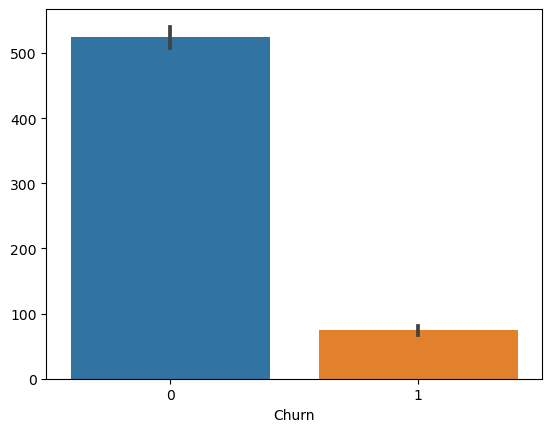

In [97]:
sns.barplot(x="Churn", y=p_df.Churn.index, data=p_df);

In [98]:
reducing_df = spark_df.groupby("Churn").count().toPandas()

In [99]:
reducing_df.head()

,Churn,count
0,1,150
1,0,750


In [100]:
type(reducing_df)

pandas.core.frame.DataFrame

## Machine Learning Application Example

In [101]:
spark_df = spark.read.csv("./datasets/churn.csv", header = True, inferSchema = True)<

In [102]:
spark_df.show(10)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|  5|Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|     Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  7|   Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|  8|     Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0|    1|
|  9|  Jennifer Lynch|40.0| 

In [103]:
# Transform Col Names
spark_df = spark_df.toDF(*[col.lower() for col in spark_df.columns])

In [105]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [106]:
# Rename Col Names
spark_df = spark_df.withColumnRenamed("_c0", "index")

In [107]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [108]:
# Total observations
spark_df.count()

900

In [111]:
# Cols Length
len(spark_df.columns)

8

In [112]:
# Col names
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [114]:
# Describes statistics
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         NULL|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         NULL|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [117]:
# Select a variable
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [119]:
# Drop missing values
spark_df = spark_df.dropna()

In [121]:
# Add new feature
spark_df = spark_df.withColumn("age_squared", spark_df.age**2)

In [122]:
spark_df.show(2)

+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_squared|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|     1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|     1681.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+
only showing top 2 rows



In [123]:
# Define dependent variable
from pyspark.ml.feature import StringIndexer

In [128]:
stringIndexer = StringIndexer(inputCol="churn", outputCol="label")

In [129]:
trans = stringIndexer.fit(spark_df)

In [130]:
indexed = trans.transform(spark_df)

In [131]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [132]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_squared|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|     1764.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|     1681.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|     1444.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|     1764.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|     1369.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+-----+
only showing top 5 rows



In [133]:
# Define independent variables
from pyspark.ml.feature import VectorAssembler

In [134]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_squared',
 'label']

In [135]:
independent_variables = ["age","total_purchase","account_manager","years","num_sites"]

In [136]:
vectorAssembler = VectorAssembler(inputCols=independent_variables, outputCol="features")

In [137]:
va_df = vectorAssembler.transform(spark_df)

In [138]:
va_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+-----+--------------------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_squared|label|            features|
+-----+----------------+----+--------------+---------------+-----+---------+-----+-----------+-----+--------------------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|     1764.0|    1|[42.0,11066.8,0.0...|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|     1681.0|    1|[41.0,11916.22,0....|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|     1444.0|    1|[38.0,12884.75,0....|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|     1764.0|    1|[42.0,8010.76,0.0...|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|     1369.0|    1|[37.0,9191.58,0.0...|
+-----+----------------+

In [139]:
final_df = va_df.select(["features","label"])

In [140]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



In [141]:
# Split Train and Test Dfs
splits = final_df.randomSplit([0.80,0.20])

In [142]:
train_df = splits[0]
test_df = splits[1]

In [145]:
train_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[22.0,11254.38,1....|    0|
|[25.0,9672.03,0.0...|    0|
|[26.0,8787.39,1.0...|    1|
|[26.0,8939.61,0.0...|    0|
|[27.0,8628.8,1.0,...|    0|
+--------------------+-----+
only showing top 5 rows



In [146]:
test_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[28.0,8670.98,0.0...|    0|
|[30.0,8677.28,1.0...|    0|
|[30.0,8874.83,0.0...|    0|
|[30.0,10960.52,1....|    0|
|[31.0,9574.89,0.0...|    0|
+--------------------+-----+
only showing top 5 rows



In [148]:
# Modelling
from pyspark.ml.classification import GBTClassifier

In [149]:
gbm = GBTClassifier(maxIter=10, featuresCol="features", labelCol="label")

In [150]:
gbm_model = gbm.fit(train_df)

In [152]:
y_pred = gbm_model.transform(test_df)

In [154]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [155]:
accuracy = y_pred.select("label","prediction")

In [156]:
accuracy.filter(accuracy.label == accuracy.prediction).count()/accuracy.count()

23/12/25 18:14:00 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/12/25 18:14:00 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


0.9027027027027027

In [157]:
# Model Tunning

In [158]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [159]:
evaluator = BinaryClassificationEvaluator()

In [160]:
paramGrid = (ParamGridBuilder().addGrid(gbm.maxDepth, [2,4,6]).addGrid(gbm.maxBins,[20,30]).addGrid(gbm.maxIter, [10,20]).build())

In [161]:
cv = CrossValidator(estimator=gbm, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=10)

In [162]:
cv_model = cv.fit(train_df)

In [164]:
y_pred = cv_model.transform(test_df)

In [165]:
accuracy = y_pred.select("label","prediction")

In [166]:
accuracy.filter(accuracy.label == accuracy.prediction).count()/accuracy.count()

0.9135135135135135

In [167]:
# Customer Leave Problem

In [176]:
import pandas as pd

names = pd.Series(['Bob Smith', 'Sally Jones', 'Mike Thompson', 'Kim Johnson', 'Bob Smith'])
ages = pd.Series([21, 34, 27, 24, 34])
total_purchase = pd.Series([251.00, 325.00, 421.00, 521.00, 825.00])
account_manager = pd.Series([1, 0, 1, 1, 0])
years = pd.Series([3, 14, 11, 9, 4])
num_sites = pd.Series([8, 14, 11, 9, 4])

new_customers = pd.DataFrame({'names': names, 'age': ages, 'total_purchase': total_purchase, 'account_manager': account_manager, 'years': years, 'num_sites': num_sites})

In [177]:
new_customers.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [178]:
# Transform to spark
new_customers_spark_df = spark.createDataFrame(new_customers)

In [179]:
new_customers_spark_df.show()

+-------------+---+--------------+---------------+-----+---------+
|        names|age|total_purchase|account_manager|years|num_sites|
+-------------+---+--------------+---------------+-----+---------+
|    Bob Smith| 21|         251.0|              1|    3|        8|
|  Sally Jones| 34|         325.0|              0|   14|       14|
|Mike Thompson| 27|         421.0|              1|   11|       11|
|  Kim Johnson| 24|         521.0|              1|    9|        9|
|    Bob Smith| 34|         825.0|              0|    4|        4|
+-------------+---+--------------+---------------+-----+---------+



In [180]:
new_customers = vectorAssembler.transform(new_customers_spark_df)

In [181]:
results = cv_model.transform(new_customers)

In [182]:
results.select("names","prediction").show() # Predictions

+-------------+----------+
|        names|prediction|
+-------------+----------+
|    Bob Smith|       0.0|
|  Sally Jones|       1.0|
|Mike Thompson|       1.0|
|  Kim Johnson|       0.0|
|    Bob Smith|       0.0|
+-------------+----------+

